In [190]:
import os
import glob
import subprocess
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from photutils import CircularAperture
from photutils import aperture_photometry
from astropy.visualization import simple_norm
from photutils import CircularAperture
from photutils import CircularAnnulus

from numpy import cov
from scipy.stats import pearsonr

from scipy import optimize

def test_func(x, a, b, c, d):
#     return a * np.sin(2 * np.pi * x) + b
    return a * np.sin(b * x + c) + d


# %matplotlib tk

In [229]:
files = glob.glob('data/*.fits')

In [230]:
columns = ['JD']
jd = []
jdai = []
for i in range(len(files)):
    jd.append(float(files[i][-11:-5])*24*3600 + float(files[i][10:17])*86400)
    jdai.append(float(files[i][10:23]))

df = pd.DataFrame(columns=columns)
df['JD'] = jd
df['JDAI'] = jdai

df

,JD,JDAI
0,2.118434e+11,2.451891e+06
1,2.118435e+11,2.451892e+06
2,2.118434e+11,2.451891e+06
3,2.118434e+11,2.451891e+06
4,2.118437e+11,2.451894e+06
...,...,...
63,2.118435e+11,2.451892e+06
64,2.118435e+11,2.451893e+06
65,2.118436e+11,2.451894e+06
66,2.118435e+11,2.451893e+06


In [234]:
aperture_1 = []
aperture_2 = []
aperture_3 = []


for i in range(len(files)):
    nest_list = []
    hdu = fits.open(files[i])

    w = WCS(hdu[0].header)

#     positions = [(100., 100.),(41,115.5),(150,143)]
#     positions = [(101., 101.),(104,159),(103.5,172.5)]
#     positions = [(101., 101.),(70,99),(103.5,172.5)]

    positions = [(101., 101.),(73.2,118.2),(103,172.5)]
#     positions = [(101., 101.),(73.2,118.2),(103.5,172.5)]
    

    aperture = CircularAperture(positions, r=6.)

    image = hdu[0].data

#     annulus_aperture = CircularAnnulus(positions, r_in=8., r_out=11.)
#     annulus_aperture = CircularAnnulus(positions, r_in=8., r_out=10.)
# better
    annulus_aperture = CircularAnnulus(positions, r_in=11., r_out=13.)

#     if(i==0):
#         norm = simple_norm(image, 'sqrt', percent = 99)
#         plt.figure(figsize=(8,8)) #size
#         plt.style.use(astropy_mpl_style) #styling and gimmicks of astropy
#         plt.imshow(image,vmin=np.median(image)-1*np.std(image),
#                    vmax=np.median(image)+10*np.std(image),cmap='gray')
#         plt.colorbar() #a bar showing the scale of the image
#         aperture.plot(color='white',lw=2)
#         annulus_aperture.plot(color='red',lw=2)
#         annulus_masks = annulus_aperture.to_mask(method='center')
#         plt.imshow(annulus_masks[0], interpolation='nearest')
#         plt.colorbar()
#     print(aperture)

    annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=13)
    apers = [aperture, annulus_aperture]
    phot_table = aperture_photometry(image, apers)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output



#             if(j==7 and k==2):
#                 norm = simple_norm(image, 'sqrt', percent = 99)
#                 plt.figure(figsize=(8,8)) #size
#                 plt.style.use(astropy_mpl_style) #styling and gimmicks of astropy
#                 plt.imshow(image,vmin=np.median(image)-1*np.std(image),
#                            vmax=np.median(image)+10*np.std(image),cmap='gray')
#                 plt.colorbar() #a bar showing the scale of the image
#                 aperture.plot(color='white',lw=2)
#                 annulus_aperture.plot(color='red',lw=2)
#                 annulus_masks = annulus_aperture.to_mask(method='center')
#                 plt.imshow(annulus_masks[0], interpolation='nearest')
#                 plt.colorbar()


    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area

    bkg_sum = bkg_mean * aperture.area
    final_sum = phot_table['aperture_sum_0'] - bkg_sum
    phot_table['residual_aperture_sum'] = final_sum
    phot_table['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
# #             aperture_sum_list.append(nest_list)
# #             print(phot_table)
# #             print(len(nest_list))
    
#     nest_list.append(phot_table['residual_aperture_sum'])
# aperture_sum_list.append(nest_list)
    aperture_1.append(phot_table['residual_aperture_sum'][0])
    aperture_2.append(phot_table['residual_aperture_sum'][1])
    aperture_3.append(phot_table['residual_aperture_sum'][2])

    
#     print(i)
#     print(phot_table)
#             print(nest_list)
            


 [astropy.io.fits.verify]
Changed DATE-OBS from '17/12/2000' to '2000-12-17''. [astropy.wcs.wcs]
Changed DATE-OBS from '28/12/2000' to '2000-12-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '28/01/2001' to '2001-01-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '15/12/2000' to '2000-12-15''. [astropy.wcs.wcs]
Changed DATE-OBS from '02/01/2001' to '2001-01-02''. [astropy.wcs.wcs]
Changed DATE-OBS from '17/01/2001' to '2001-01-17''. [astropy.wcs.wcs]
Changed DATE-OBS from '05/02/2001' to '2001-02-05''. [astropy.wcs.wcs]
Changed DATE-OBS from '24/01/2001' to '2001-01-24''. [astropy.wcs.wcs]
Changed DATE-OBS from '21/12/2000' to '2000-12-21''. [astropy.wcs.wcs]
Changed DATE-OBS from '01/02/2001' to '2001-02-01''. [astropy.wcs.wcs]
Changed DATE-OBS from '01/01/2001' to '2001-01-01''. [astropy.wcs.wcs]
Changed DATE-OBS from '30/01/2001' to '2001-01-30''. [astropy.wcs.wcs]
Changed DATE-OBS from '04/02/2001' to '2001-02-04''. [astropy.wcs.wcs]
Changed DATE-OBS from '22/01/2001' to '2001-01-22''

In [235]:
df

,JD,JDAI,residual_aperture_sum_1,residual_aperture_sum_2,residual_aperture_sum_3,ins_mag_1,ins_mag_2,ins_mag_3,diff_mag_1,diff_mag_2,diff_mag_3
0,2.118434e+11,2.451891e+06,14430.320889,121142.345510,112742.864726,-23.942717,-29.261804,-29.082162,5.139445,-0.179641,0.0
1,2.118435e+11,2.451892e+06,4162.407179,37613.556798,35885.349753,-20.834622,-26.337800,-26.220211,5.385589,-0.117589,0.0
2,2.118434e+11,2.451891e+06,16654.239669,119936.235002,121306.494103,-24.301050,-29.236789,-29.265189,4.964139,0.028400,0.0
3,2.118434e+11,2.451891e+06,15189.895728,116235.300965,116864.014071,-24.070964,-29.158430,-29.171916,5.100951,0.013486,0.0
4,2.118437e+11,2.451894e+06,17104.785811,124109.375352,120621.113703,-24.367784,-29.322296,-29.251024,4.883240,-0.071272,0.0
...,...,...,...,...,...,...,...,...,...,...,...
63,2.118435e+11,2.451892e+06,9744.843445,79014.607368,75634.434438,-22.961234,-28.193470,-28.084167,5.122933,-0.109303,0.0
64,2.118435e+11,2.451893e+06,15729.997736,118397.049119,118882.649723,-24.158312,-29.204498,-29.214730,5.056418,0.010233,0.0
65,2.118436e+11,2.451894e+06,14192.941138,122433.396516,115783.227524,-23.901250,-29.288306,-29.148687,5.247437,-0.139619,0.0
66,2.118435e+11,2.451893e+06,12576.602360,94936.683607,96444.369913,-23.598984,-28.652414,-28.691804,5.092821,0.039390,0.0


In [236]:
df['residual_aperture_sum_1'] = aperture_1
df['residual_aperture_sum_2'] = aperture_2
df['residual_aperture_sum_3'] = aperture_3

df['ins_mag_1'] = -2.5*np.log(df['residual_aperture_sum_1'])
df['ins_mag_2'] = -2.5*np.log(df['residual_aperture_sum_2'])
df['ins_mag_3'] = -2.5*np.log(df['residual_aperture_sum_3'])

df['diff_mag_1'] = df['ins_mag_1']-df['ins_mag_3']
df['diff_mag_2'] = df['ins_mag_2']-df['ins_mag_3']
df['diff_mag_3'] = df['ins_mag_3']-df['ins_mag_3']

df

,JD,JDAI,residual_aperture_sum_1,residual_aperture_sum_2,residual_aperture_sum_3,ins_mag_1,ins_mag_2,ins_mag_3,diff_mag_1,diff_mag_2,diff_mag_3
0,2.118434e+11,2.451891e+06,14430.320889,121142.345510,113838.175256,-23.942717,-29.261804,-29.106333,5.163616,-0.155471,0.0
1,2.118435e+11,2.451892e+06,4162.407179,37613.556798,36421.435689,-20.834622,-26.337800,-26.257282,5.422660,-0.080518,0.0
2,2.118434e+11,2.451891e+06,16654.239669,119936.235002,122230.554717,-24.301050,-29.236789,-29.284161,4.983111,0.047372,0.0
3,2.118434e+11,2.451891e+06,15189.895728,116235.300965,117413.460319,-24.070964,-29.158430,-29.183642,5.112678,0.025212,0.0
4,2.118437e+11,2.451894e+06,17104.785811,124109.375352,121853.757766,-24.367784,-29.322296,-29.276442,4.908658,-0.045854,0.0
...,...,...,...,...,...,...,...,...,...,...,...
63,2.118435e+11,2.451892e+06,9744.843445,79014.607368,75876.753328,-22.961234,-28.193470,-28.092164,5.130930,-0.101306,0.0
64,2.118435e+11,2.451893e+06,15729.997736,118397.049119,119805.729902,-24.158312,-29.204498,-29.234067,5.075755,0.029569,0.0
65,2.118436e+11,2.451894e+06,14192.941138,122433.396516,117018.778501,-23.901250,-29.288306,-29.175224,5.273974,-0.113082,0.0
66,2.118435e+11,2.451893e+06,12576.602360,94936.683607,97906.088030,-23.598984,-28.652414,-28.729410,5.130427,0.076996,0.0


In [237]:
df = df.sort_values(by=['JD'])
df

,JD,JDAI,residual_aperture_sum_1,residual_aperture_sum_2,residual_aperture_sum_3,ins_mag_1,ins_mag_2,ins_mag_3,diff_mag_1,diff_mag_2,diff_mag_3
8,2.118434e+11,2.451891e+06,17045.862694,120860.902408,121980.383524,-24.359157,-29.255989,-29.279039,4.919882,0.023050,0.0
30,2.118434e+11,2.451891e+06,18725.793692,120157.112515,125690.864465,-24.594143,-29.241389,-29.353952,4.759809,0.112563,0.0
17,2.118434e+11,2.451891e+06,14910.494799,116295.951683,113681.191125,-24.024551,-29.159734,-29.102883,5.078332,-0.056851,0.0
3,2.118434e+11,2.451891e+06,15189.895728,116235.300965,117413.460319,-24.070964,-29.158430,-29.183642,5.112678,0.025212,0.0
42,2.118434e+11,2.451891e+06,15029.989218,112994.577985,115575.903251,-24.044507,-29.087738,-29.144207,5.099700,0.056469,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16,2.118437e+11,2.451894e+06,21745.129419,123040.407718,129132.835953,-24.967863,-29.300670,-29.421492,4.453630,0.120822,0.0
53,2.118437e+11,2.451895e+06,17980.222019,112897.929273,114868.431139,-24.492569,-29.085599,-29.128857,4.636288,0.043258,0.0
26,2.118437e+11,2.451895e+06,18515.318741,100608.559082,106154.684557,-24.565884,-28.797482,-28.931631,4.365747,0.134150,0.0
31,2.118437e+11,2.451895e+06,18530.102162,106923.364736,110902.153894,-24.567880,-28.949669,-29.041009,4.473129,0.091340,0.0


In [238]:
df = df.reset_index(drop=True)
df

,JD,JDAI,residual_aperture_sum_1,residual_aperture_sum_2,residual_aperture_sum_3,ins_mag_1,ins_mag_2,ins_mag_3,diff_mag_1,diff_mag_2,diff_mag_3
0,2.118434e+11,2.451891e+06,17045.862694,120860.902408,121980.383524,-24.359157,-29.255989,-29.279039,4.919882,0.023050,0.0
1,2.118434e+11,2.451891e+06,18725.793692,120157.112515,125690.864465,-24.594143,-29.241389,-29.353952,4.759809,0.112563,0.0
2,2.118434e+11,2.451891e+06,14910.494799,116295.951683,113681.191125,-24.024551,-29.159734,-29.102883,5.078332,-0.056851,0.0
3,2.118434e+11,2.451891e+06,15189.895728,116235.300965,117413.460319,-24.070964,-29.158430,-29.183642,5.112678,0.025212,0.0
4,2.118434e+11,2.451891e+06,15029.989218,112994.577985,115575.903251,-24.044507,-29.087738,-29.144207,5.099700,0.056469,0.0
...,...,...,...,...,...,...,...,...,...,...,...
63,2.118437e+11,2.451894e+06,21745.129419,123040.407718,129132.835953,-24.967863,-29.300670,-29.421492,4.453630,0.120822,0.0
64,2.118437e+11,2.451895e+06,17980.222019,112897.929273,114868.431139,-24.492569,-29.085599,-29.128857,4.636288,0.043258,0.0
65,2.118437e+11,2.451895e+06,18515.318741,100608.559082,106154.684557,-24.565884,-28.797482,-28.931631,4.365747,0.134150,0.0
66,2.118437e+11,2.451895e+06,18530.102162,106923.364736,110902.153894,-24.567880,-28.949669,-29.041009,4.473129,0.091340,0.0


In [260]:
df.to_csv('data.csv')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

fig.patch.set_facecolor('lightgrey')

plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
ax.set_ylabel('Differential Magnitude',fontsize=20)

# ax.set_xlabel('JD', fontsize=20)
# ax.scatter(df['JDAI'],df['diff_mag_1'],marker='x', label='Cepheid')
# ax.scatter(df['JDAI'],df['diff_mag_2'],s=50,marker='o', label='Reference Star 1')
# ax.scatter(df['JDAI'],df['diff_mag_3'],s=50,marker='+', label='Reference Star 2')

ax.set_xlabel('JD (seconds)', fontsize=20)
ax.scatter(df['JD'],df['diff_mag_1'],marker='x', label='Cepheid')
ax.scatter(df['JD'],df['diff_mag_2'],s=50,marker='o', label='Reference Star 1')
ax.scatter(df['JD'],df['diff_mag_3'],s=50,marker='+', label='Reference Star 2')
        
plt.legend(prop={'size': 20})

params1, params_covariance1 = optimize.curve_fit(test_func, df['JD'], df['diff_mag_1'], p0=[.6, 0.00004, 496.5, 5])
ax.scatter(np.arange(df['JD'].min(),df['JD'].max(), 0.01), test_func(np.arange(df['JD'].min(),df['JD'].max(), 0.01), params1[0], params1[1], params1[2], params1[3]))
# ax.scatter(np.arange(df['JDAI'].min(),df['JDAI'].max(), 0.01), test_func(np.arange(df['JDAI'].min(),df['JDAI'].max(), 0.01), .6, 3, -200, params1[3]))
# ax.scatter(np.arange(df['JD'].min(),df['JD'].max(), 1000), test_func(np.arange(df['JD'].min(),df['JD'].max(), 1000), .6, 0.00005, 500.4, params1[3]), c='red')
# ax.scatter(np.arange(df['JD'].min(),df['JD'].max(), 1000), test_func(np.arange(df['JD'].min(),df['JD'].max(), 1000), .6, 0.00005, 500.9, params1[3]), c='green')
ax.plot(np.arange(df['JD'].min(),df['JD'].max(), 1000), test_func(np.arange(df['JD'].min(),df['JD'].max(), 1000), .6, 0.00004, 496.5, params1[3]), c='red')



print(params1)

plt.show()
# plt.savefig('diff-mag.png')



[ -0.29230222   3.00000458 188.58792192   4.98116696]


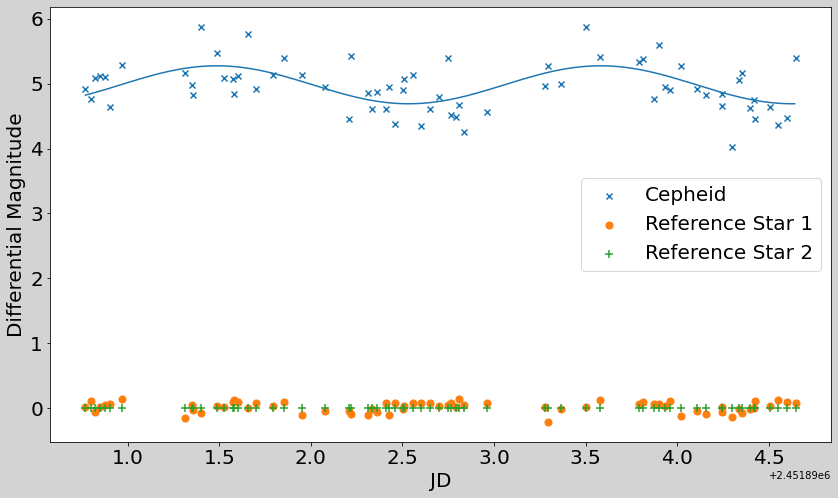

In [378]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

fig.patch.set_facecolor('lightgrey')

plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
ax.set_ylabel('Differential Magnitude',fontsize=20)

ax.set_xlabel('JD', fontsize=20)
ax.scatter(df['JDAI'],df['diff_mag_1'],marker='x', label='Cepheid')
ax.scatter(df['JDAI'],df['diff_mag_2'],s=50,marker='o', label='Reference Star 1')
ax.scatter(df['JDAI'],df['diff_mag_3'],s=50,marker='+', label='Reference Star 2')

# ax.set_xlabel('JD (seconds)', fontsize=20)
# ax.scatter(df['JD'],df['diff_mag_1'],marker='x', label='Cepheid')
# ax.scatter(df['JD'],df['diff_mag_2'],s=50,marker='o', label='Reference Star 1')
# ax.scatter(df['JD'],df['diff_mag_3'],s=50,marker='+', label='Reference Star 2')
        
plt.legend(prop={'size': 20})

# params1, params_covariance1 = optimize.curve_fit(test_func, df['JDAI'], df['diff_mag_1'])
params1, params_covariance1 = optimize.curve_fit(test_func, df['JDAI'], df['diff_mag_1'], p0=[.6,3,200,5])
ax.plot(np.arange(df['JDAI'].min(),df['JDAI'].max(), 0.01), test_func(np.arange(df['JDAI'].min(),df['JDAI'].max(), 0.01), params1[0], params1[1], params1[2], params1[3]))
# ax.scatter(np.arange(df['JDAI'].min(),df['JDAI'].max(), 0.01), test_func(np.arange(df['JDAI'].min(),df['JDAI'].max(), 0.01), .6, 3, -200, params1[3]))
# ax.plot(np.arange(df['JDAI'].min(),df['JDAI'].max(), 0.01), test_func(np.arange(df['JDAI'].min(),df['JDAI'].max(), 0.01), .6, 3, -199.5, params1[3]), c='red')

print(params1)

plt.show()
# plt.savefig('diff-mag.png')



In [397]:
P = 2*np.pi/(params1[1])

In [409]:
P

2.0943919079939213

In [414]:
mag_v1_min = -2.81*np.log(P) - 1.53
mag_v1_max = -2.81*np.log(P) - 1.33
# M_v1 = -2.76*(np.log(P)-1) - 4.16
M_v1 = (mag_v1_min + mag_v1_max)/2
M_v1

-3.5073297396002197

In [415]:
m_v3 = 14.8
m_v1 = params1[3] + m_v3
m_v1

19.781166961939423

In [416]:
distance = 10**(1+(m_v1 - M_v1)/5)
distance

454673.18341335